--------------------------WEB SCRAPING----------------------

In [1]:
#Libraries
import requests
from bs4 import BeautifulSoup
import datetime
import pandas as pd
import re
import time
import random

In [2]:
#Read CSV database
try:
    df_csv = pd.read_csv("balls_results.csv")
    number_rows = df_csv.shape[0]
    print("Number_rows: "+str(number_rows))
    #Take all the dataframe csv
    df_results = df_csv
    print(df_results)
except Exception as e:
    number_rows = 0
    print("It will create a new file of database because: "+str(e))
    df_results = pd.DataFrame(columns=['NumberRow', 'Date', 'Ball1', 'Ball2', 'Ball3', 'Ball4', 'Ball5'])
    

Number_rows: 47
    NumberRow        Date  Ball1  Ball2  Ball3  Ball4  Ball5
0           1  20-10-2023     10     11     18     32     38
1           2  23-10-2023     10     11     16     26     28
2           3  24-10-2023      5      9     19     28     34
3           4  26-10-2023      4      9     21     30     35
4           5  27-10-2023      7     12     21     30     32
5           6  30-10-2023      1      3      8     11     26
6           7  31-10-2023      1     11     12     19     30
7           8  02-11-2023      1      4     15     22     30
8           9  03-11-2023      8     22     25     35     36
9          10  06-11-2023      7     12     21     28     37
10         11  07-11-2023     13     16     21     25     34
11         12  09-11-2023     11     20     27     33     37
12         13  10-11-2023      3      6     14     19     38
13         14  13-11-2023      9     11     12     32     38
14         15  14-11-2023      1      3     17     20     38
15      

In [3]:
#Function Dates
def extract_dates (soup):

    # Dictionary months to numbers
    month_to_number = {
        'ENERO': '01',
        'FEBRERO': '02',
        'MARZO': '03',
        'ABRIL': '04',
        'MAYO': '05',
        'JUNIO': '06',
        'JULIO': '07',
        'AGOSTO': '08',
        'SEPTIEMBRE': '09',
        'OCTUBRE': '10',
        'NOVIEMBRE': '11',
        'DICIEMBRE': '12'
    }
    date = soup.find('div', class_='fs-5')
    date = date.text.strip()
    pattern_dates = r"(\d+ de \w+ de \d{4})"
    date = re.search(pattern_dates, date)
    if date:
        date = date.group(1)
        date = date.upper()
        date = date.replace(" ", "")
        date = date.replace("DE", "-")
        # split string
        parts = date.split('-')
        
        # get number of months
        month = parts[1].upper()
        month = month_to_number.get(month)
        date = f"{parts[0]}-{month}-{parts[2]}"
    else:
        date = 'NULL'
    return date

In [4]:
#Extract balls
counter_results = number_rows
response_status = True

#Create URL
while(response_status):
    counter_results = counter_results+1
    url = 'https://baloto.com/miloto/resultados-miloto/'
    url = url + '/' + str(counter_results)
    response = requests.get(url)
    #Convert all in html
    soup = BeautifulSoup(response.content, 'html.parser')
    
    #If response is 200 (ok)
    if(response.status_code == 200):
        balls = []
        #Insert the row number
        number_row = counter_results
        #Insert the dates
        date = extract_dates(soup)
        #Insert the balls
        counter_balls = 0
        for ball in soup.find_all(class_='yellow-ball'):
            counter_balls = counter_balls+1
            balls.append(ball.text.strip())
        #Insert new row
        df_results.loc[len(df_results)] = [number_row, date, balls[0], balls[1], balls[2], balls[3], balls[4]]
    else:
        response_status = False
    # Wait time
    time.sleep(random.randint(1, 5))
print(df_results.to_string(index=False))

    
    #df_results.append(balls, ignore_index=True)
    #print(df_results)

 NumberRow       Date  Ball1  Ball2  Ball3  Ball4  Ball5
         1 20-10-2023     10     11     18     32     38
         2 23-10-2023     10     11     16     26     28
         3 24-10-2023      5      9     19     28     34
         4 26-10-2023      4      9     21     30     35
         5 27-10-2023      7     12     21     30     32
         6 30-10-2023      1      3      8     11     26
         7 31-10-2023      1     11     12     19     30
         8 02-11-2023      1      4     15     22     30
         9 03-11-2023      8     22     25     35     36
        10 06-11-2023      7     12     21     28     37
        11 07-11-2023     13     16     21     25     34
        12 09-11-2023     11     20     27     33     37
        13 10-11-2023      3      6     14     19     38
        14 13-11-2023      9     11     12     32     38
        15 14-11-2023      1      3     17     20     38
        16 16-11-2023      6      7     11     23     36
        17 17-11-2023      8   

In [5]:
df_results.to_csv('balls_results.csv', index=False)

--------------------------------ANALYTICS--------------------------------

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df_analytics = pd.read_csv("balls_results.csv")
df_frequency = df_analytics.drop(['NumberRow', 'Date'], axis=1)
df_probability = df_analytics.drop(['NumberRow', 'Date'], axis=1)

-----------ANALYTICS FREQUENCY----------------

3     11
8     10
17     9
7      9
21     9
34     9
23     8
11     8
6      8
9      8
30     7
13     7
25     7
19     7
28     7
38     7
29     6
37     6
1      6
15     6
31     6
10     6
20     5
33     5
14     5
12     5
26     5
27     5
22     4
4      4
2      4
24     4
5      4
18     4
32     3
35     3
16     3
36     3
39     2
Name: Número, dtype: int64


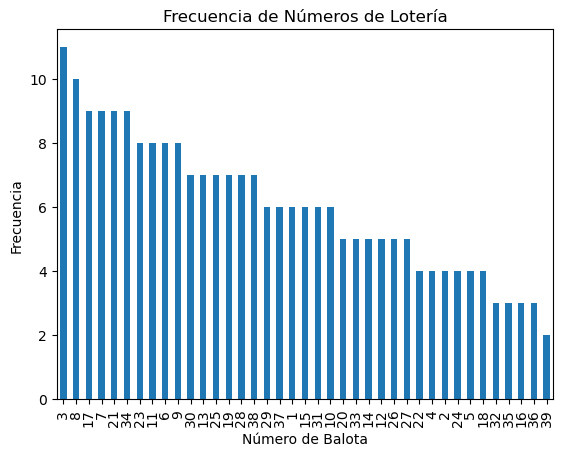

In [7]:
# Reestructurar los datos
df_frequency = df_frequency.melt(var_name='Sorteo', value_name='Número')

# Análisis de frecuencia
frequency = df_frequency['Número'].value_counts()

# Ordenar por frecuencia
frequency  = frequency.sort_values(ascending=False)

# Mostrar resultados
print(frequency)

# Visualización
frequency.plot(kind='bar')
plt.title('Frecuencia de Números de Lotería')
plt.xlabel('Número de Balota')
plt.ylabel('Frecuencia')
plt.show()

-----------ANALYTICS PROBABILITY----------------

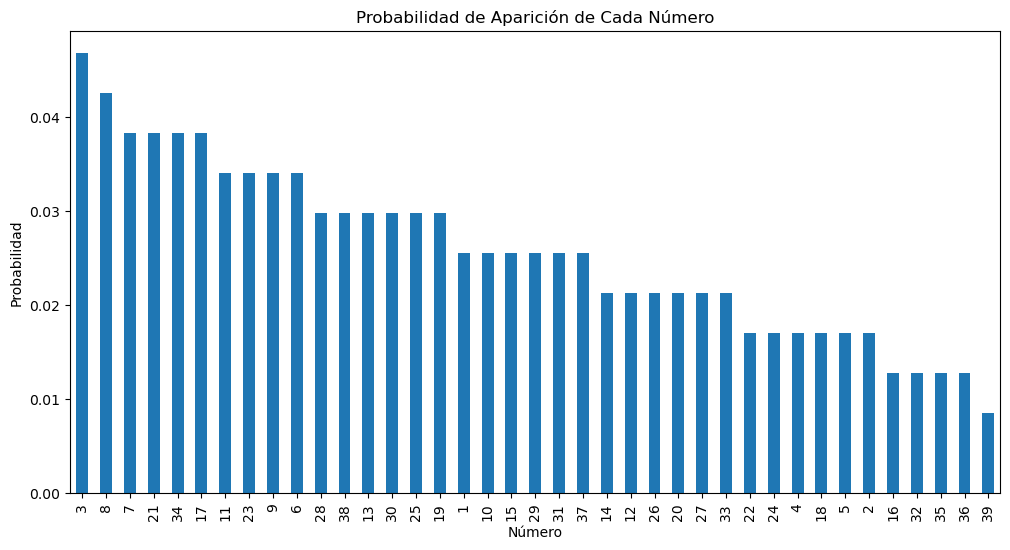

In [8]:
# Aplanar todos los números en una sola serie
all_numbers = df_probability.values.flatten()

# Calcular frecuencias
frequency = pd.Series(all_numbers).value_counts()

# Convertir frecuencias a probabilidades
probability = frequency / frequency.sum()

# Ordenar los resultados
probability = probability.sort_values(ascending=False)

# Visualización
probability.plot(kind='bar', figsize=(12, 6))
plt.title('Probabilidad de Aparición de Cada Número')
plt.xlabel('Número')
plt.ylabel('Probabilidad')
plt.show()